In [20]:
from empath import Empath
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook
from scipy.stats.stats import pearsonr
from function_library import *
from function_library2 import *

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import host_subplot
import matplotlib.pyplot as plt
import mpl_toolkits.axisartist as AA


In [2]:
# load CRA meeting minutes data
df = pd.read_csv('/Users/joey/Downloads/CRA_Meeting_Minutes_Coded_2020421.csv')
date = pd.to_datetime(df['DATE'])
df['date'] = date


In [3]:
unique_date = pd.Series(df['date'].unique())
money_sums = df.groupby(['date'])['MONEY'].sum()

# number of money related decisions
m_decision_sums = df.groupby(['date'])['MONEY'].count() 
# number of all decisions
all_decision_sums = df.groupby(['date'])['PARTICIPANTS'].count() 


In [4]:
# find money amount and 
money_amounts = np.zeros((6,12))
decision_amounts = np.zeros((6,12))
for i in range(len(money_sums)):
    unique_date.dt.year[i]
    i_x = unique_date.dt.year[i]-2012
    i_y = unique_date.dt.month[i]-1
    money_amounts[i_x,i_y] = money_sums[i]
    decision_amounts[i_x,i_y] = m_decision_sums[i]

In [76]:
# load email data
year_list = fromPickle('year_list')
month_list = fromPickle('month_list')
empath_normed=np.loadtxt('empath_normed.txt')

email_by_month=np.zeros((6,12))
for i in range(len(month_list)):
    year_idx = year_list[i]-2012
    month_idx = month_list[i]-1
    email_by_month[year_idx, month_idx] += empath_normed[i, 3]

In [77]:
# normalize 
# not necessary if plot in different scale

money_amounts = money_amounts.reshape(-1)
# money_amounts = money_amounts/money_amounts.max()
decision_amounts = decision_amounts.reshape(-1)
# dicision_amounts = dicision_amounts/dicision_amounts.max()
email_by_month = email_by_month.reshape(-1)
# email_by_month = email_by_month/email_by_month.max()


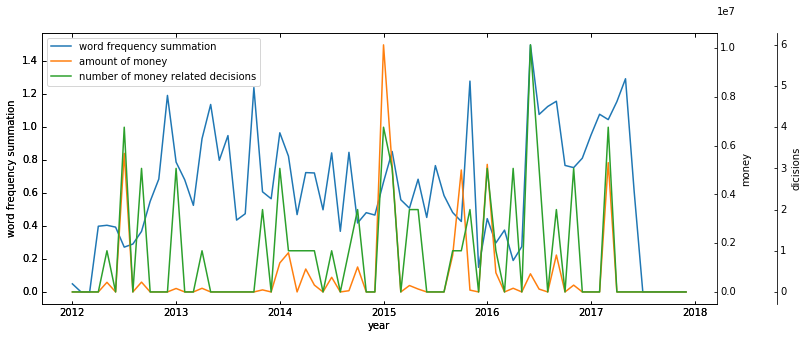

In [95]:
# plotting
plt.figure(figsize=(15,5))
host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

offset = 60
new_fixed_axis = par2.get_grid_helper().new_fixed_axis
par2.axis["right"] = new_fixed_axis(loc="right", axes=par2, offset=(offset, 0))
par1.axis["right"].toggle(all=True)

host.set_xlabel("year")
host.set_ylabel("word frequency summation")
par1.set_ylabel("money")
par2.set_ylabel("dicisions")

p1, = host.plot(email_by_month, label = 'word frequency summation')
p2, = par1.plot(money_amounts, label = 'amount of money')
p3, = par2.plot(decision_amounts, label = 'number of money related decisions')

host.set_xticks(np.linspace(0,12*6,7))
host.set_xticklabels(['2012','2013','2014','2015','2016','2017','2018'])
host.legend()
plt.draw()
plt.show()

In [79]:
np.cov(email_by_month, money_amounts)

array([[1.37390936e-01, 3.46656391e+04],
       [3.46656391e+04, 3.11572550e+12]])

In [80]:
np.corrcoef(email_by_month, money_amounts)

array([[1.        , 0.05298349],
       [0.05298349, 1.        ]])

In [81]:
np.cov(email_by_month, decision_amounts)

array([[0.13739094, 0.14189281],
       [0.14189281, 1.86365415]])

In [82]:
np.corrcoef(email_by_month, decision_amounts)

array([[1.        , 0.28041336],
       [0.28041336, 1.        ]])

In [83]:
np.cov(money_amounts, decision_amounts)

array([[3.11572550e+12, 1.41112814e+06],
       [1.41112814e+06, 1.86365415e+00]])

In [84]:
np.corrcoef(money_amounts, decision_amounts)

array([[1.        , 0.58560422],
       [0.58560422, 1.        ]])

# Extract commissioner related emails

In [44]:
df = pd.read_csv('new_clean_output.csv',index_col = 0)
from_list = df['From'].values.tolist()
to_list = df['To'].values.tolist()
cc_list = df['CC'].values.tolist()

In [36]:
bodies_in_a_line = fromPickle('bodies_in_a_line')
# sent_list = fromPickle('sent_list')
# from_list = fromPickle('from_list')
# to_list = fromPickle('to_list')

In [107]:
namelist= ['Marks','Maddox','Dailey','Desloge','Miller','Mustian','Sauls','Ziffer','Gillum','Maddox','Lindley','Dozier','Proctor','Richardson']
for i in range(len(namelist)):
    namelist[i] = namelist[i].lower()
keep_idx=[]
for i in range(len(bodies_in_a_line)):
    for name in namelist:
        if name in from_list[i].lower() or name in to_list[i].lower() or name in cc_list[i].lower():
            keep_idx.append(i)
            break
#         if name in bodies_in_a_line[i].lower():
#             keep_idx.append(i)
#             break


In [108]:
# number of emails left
len(keep_idx)

1928

In [119]:
# load email data
year_list = np.array(fromPickle('year_list'))[keep_idx]
month_list = np.array(fromPickle('month_list'))[keep_idx]
empath_normed=np.loadtxt('empath_normed.txt')
empath_normed2 = empath_normed[keep_idx,:]
email_by_month2=np.zeros((6,12))
# email_number_by_month2=np.zeros((6,12))

for i in range(len(month_list)):
    year_idx = year_list[i]-2012
    month_idx = month_list[i]-1
    email_by_month2[year_idx, month_idx] += empath_normed2[i, 3]
#     email_number_by_month2[year_idx, month_idx] += 1
# reshape
email_by_month2 = email_by_month2.reshape(-1)
# email_number_by_month2 = email_number_by_month2.reshape(-1)

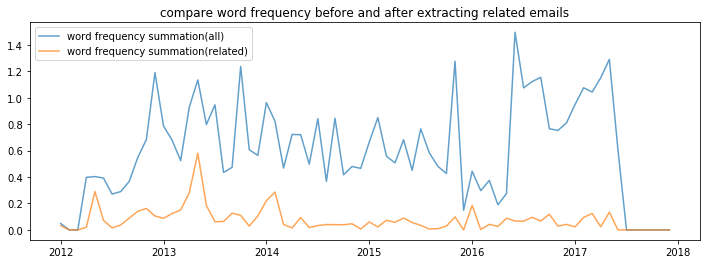

In [118]:
# compare word frequency before and after extract related emails
plt.figure(figsize=(12,4))
alpha = 0.7
plt.plot(email_by_month, alpha = alpha, label = 'word frequency summation(all)')
plt.plot(email_by_month2, alpha = alpha, label = 'word frequency summation(related)')
plt.legend()
plt.xticks(np.linspace(0,12*6,7),['2012','2013','2014','2015','2016','2017','2018'])
plt.title('compare word frequency before and after extracting related emails')
plt.show()

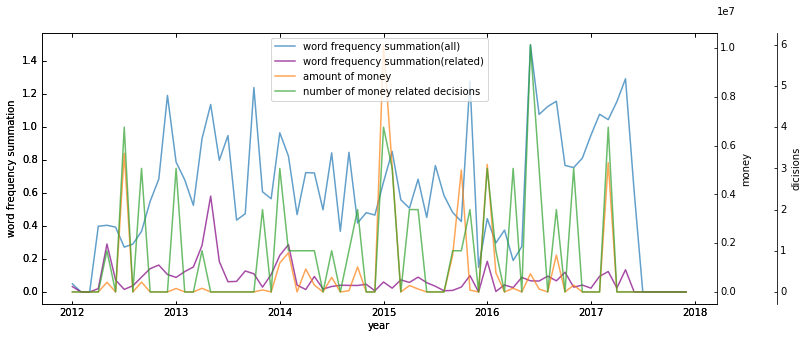

In [111]:
# plotting with #decision and #money
plt.figure(figsize=(15,5))
host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

offset = 60
new_fixed_axis = par2.get_grid_helper().new_fixed_axis
par2.axis["right"] = new_fixed_axis(loc="right", axes=par2, offset=(offset, 0))
par1.axis["right"].toggle(all=True)

host.set_xlabel("year")
host.set_ylabel("word frequency summation")
par1.set_ylabel("money")
par2.set_ylabel("dicisions")

alpha = 0.7
p1, = host.plot(email_by_month, alpha = alpha, label = 'word frequency summation(all)')
p2, = par1.plot(money_amounts, alpha = alpha, label = 'amount of money')
p3, = par2.plot(decision_amounts, alpha = alpha, label = 'number of money related decisions')
p1, = host.plot(email_by_month2, alpha = alpha, color = 'purple', label = 'word frequency summation(related)')


host.set_xticks(np.linspace(0,12*6,7))
host.set_xticklabels(['2012','2013','2014','2015','2016','2017','2018'])
host.legend()
plt.draw()
plt.show()

In [80]:
# correlation between all emails and money amount 

np.corrcoef(email_by_month, money_amounts)

array([[1.        , 0.05298349],
       [0.05298349, 1.        ]])

In [113]:
# correlation between related emails and money amount 

np.corrcoef(email_by_month2, money_amounts)

array([[1.        , 0.00805425],
       [0.00805425, 1.        ]])

In [82]:
# correlation between all emails and decision amount 

np.corrcoef(email_by_month, decision_amounts)

array([[1.        , 0.28041336],
       [0.28041336, 1.        ]])

In [115]:
# correlation between related emails and decision amount 

np.corrcoef(email_by_month2, decision_amounts)

array([[1.        , 0.03248732],
       [0.03248732, 1.        ]])

In [117]:
np.corrcoef(money_amounts, decision_amounts)

array([[1.        , 0.58560422],
       [0.58560422, 1.        ]])